In [1]:
import numpy as np
import matplotlib.pyplot as plt

# k-Nearest Neighbors (kNN)

k-Nearest neighbor (kNN) is an extremely simple yet surprisingly effective method for classification. 
The only things it requires are:

- Some notion of distance (Euclidean distance is the most common choice).
- An assumption that points that are close to one another are similar.

Classification is computed from a simple majority vote of the nearest neighbors of each point: a new point is assigned the  class which has the most representatives within the nearest neighbors of the point.

![knn](images/knn.gif "segment")

kNN appeal stems from the fact that 

- its classification boundaries are nonlinear, 
- there is only a single integer parameter `n_neighbors`, and
- the expected quality of predictions improves automatically as the amount of training data increases. 

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note (from the scikit learn user guide)</p>
<p>
The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a new point is computed from a simple majority vote of the nearest neighbors.
Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. 
This can be accomplished through the <tt>weights</tt> keyword.
    The default value, <tt>weights = 'uniform'</tt>, assigns uniform weights to each neighbor. 
    <tt>weights = 'distance'</tt> assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.
</p>
</div>

**`KNeighborsClassifier` hyperparameters:**

| hyperparameter      | description |
| :-- | :-- |
| `n_neighbors`      | Number of neighbors to use to classify new points (default=5) |
| `weights`   | weight function used in prediction: <br> <br> - `uniform`:  all points in each neighborhood are weighted equally <br> <br> - `distance`: weight points by the inverse of their distance <br> <br> callable: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.  |
| `p`      | Power parameter for the Minkowski metric (default=2, i.e., Euclidean distance)  |
| `metric` | the distance metric to use (default = 'Minkowski'). See [this page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric) for a list of available metrics

## Nearest Neighbors Classification Examples

In [2]:
from sklearn.neighbors import KNeighborsClassifier

Sample usage of Nearest Neighbors classification. 
We will plot the classification boundaries/regions for each class.

- [Three-blobs dataset](#Example-1:-Three-blobs-dataset)
- [Two-moons dataset](#Example-2:-Two-moons-dataset)
- [Two-circles dataset](#Example-3:-Two-circles-dataset)

In [3]:
def draw_classification_regions(X,y,model):
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .1
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)

    ax.set_xlabel('feature #1', fontsize=15)
    ax.set_ylabel('feature #2', fontsize=15)

    ax.legend()

### Example 1: Three-blobs dataset

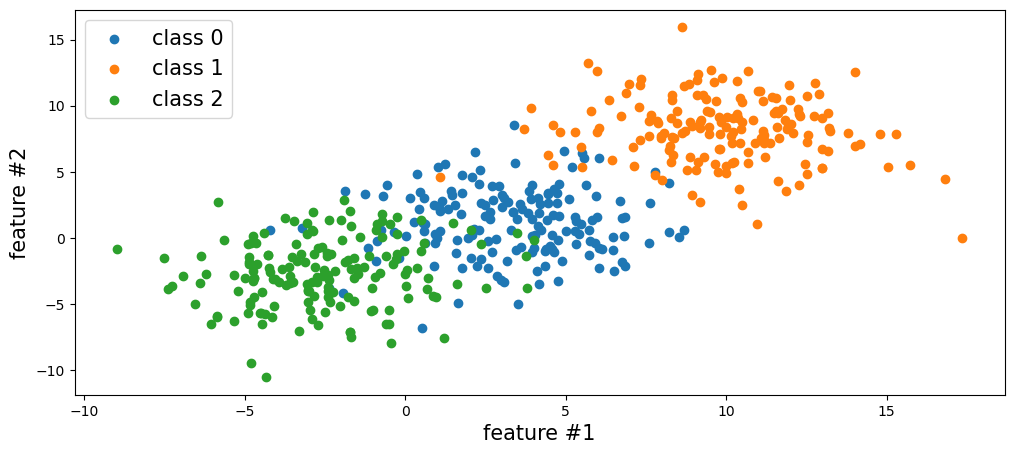

In [4]:
from sklearn.datasets import make_blobs

# generate a toy dataset with three blobs
X,y = make_blobs(n_samples=500, centers = 3, cluster_std=2.5)

# plot dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==0,0],X[y==0,1],label = 'class '+str(0))
ax.scatter(X[y==1,0],X[y==1,1],label = 'class '+str(1))
ax.scatter(X[y==2,0],X[y==2,1],label = 'class '+str(2))

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)

ax.legend(fontsize=15)

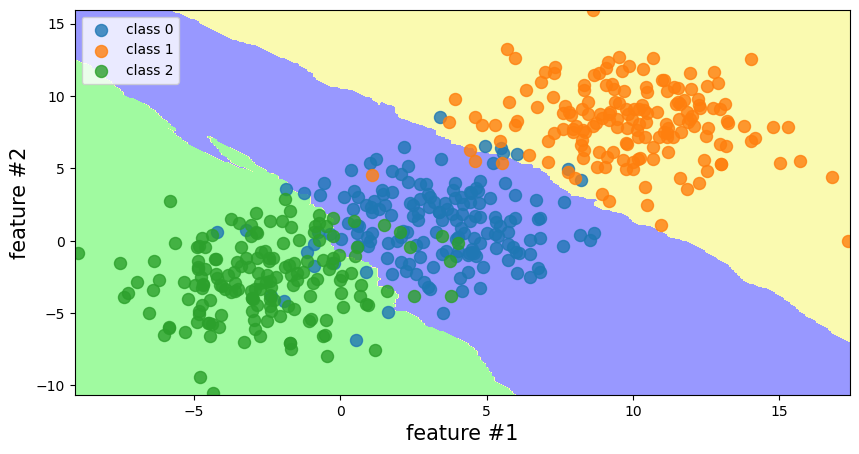

In [5]:
# knn hyperparameters
n_neighbors = 20
weights = 'uniform'

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,knn_clf)

### Example 2: Two-moons dataset

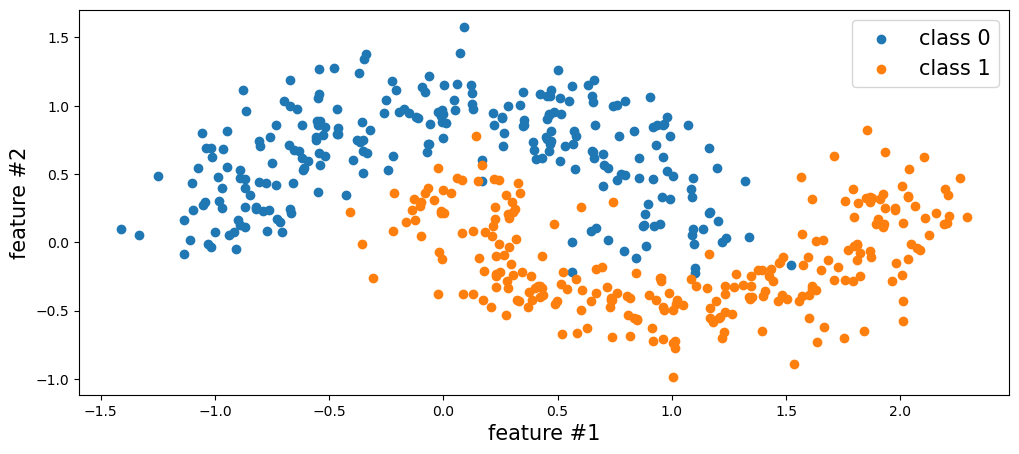

In [6]:
# generate and plot the two-moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.2)

# plot dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==0,0],X[y==0,1],label = 'class '+str(0))
ax.scatter(X[y==1,0],X[y==1,1],label = 'class '+str(1))

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)

ax.legend(fontsize=15)

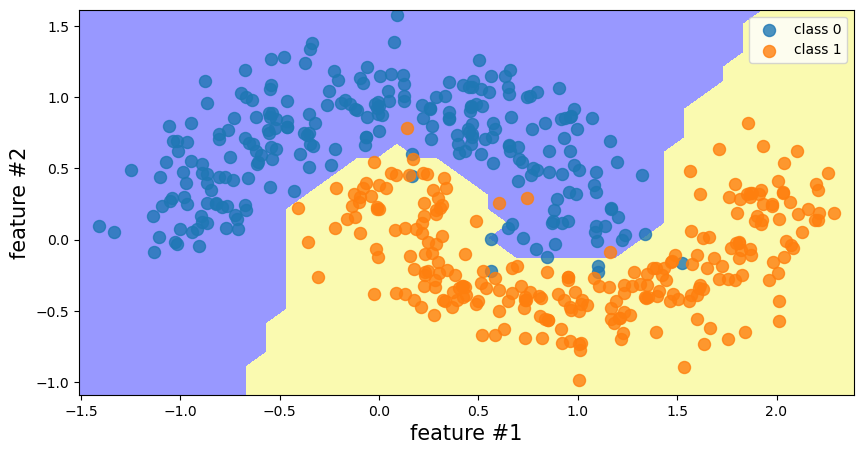

In [7]:
# knn hyperparameters
n_neighbors = 20
weights = 'uniform'

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,knn_clf)

### Example 3: Two-circles dataset

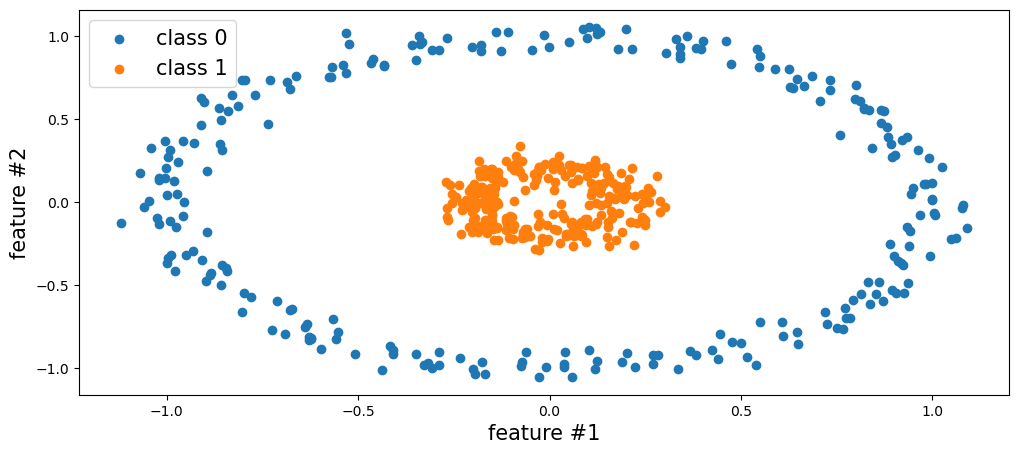

In [8]:
# run this cell to generate and plot the second toy dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.05, factor=0.2)

# plot dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==0,0],X[y==0,1],label = 'class '+str(0))
ax.scatter(X[y==1,0],X[y==1,1],label = 'class '+str(1))

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)

ax.legend(fontsize=15)

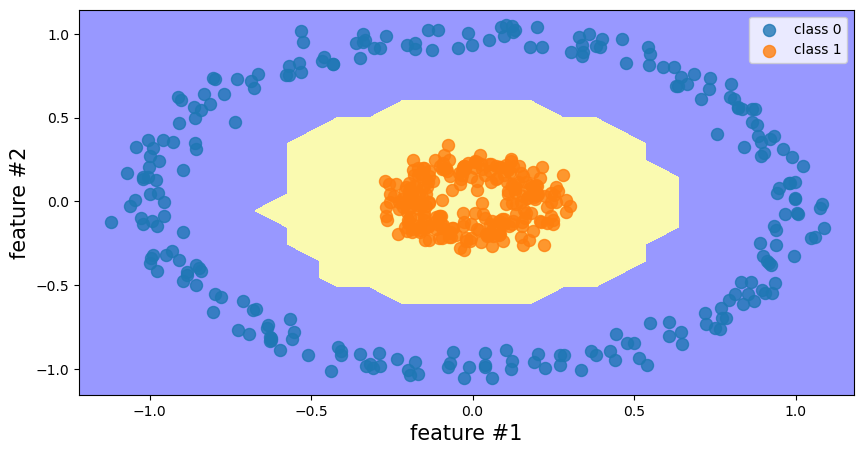

In [9]:
# knn hyperparameters
n_neighbors = 20
weights = 'uniform'

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,knn_clf)